In [ ]:
#import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
#Urls We're scraping.
sports_teams = { 
                  "mens_volleyball" : ['https://ccnyathletics.com/sports/mens-volleyball/roster', 
                                       'https://lehmanathletics.com/sports/mens-volleyball/roster',
                                       'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster',
                                       'https://johnjayathletics.com/sports/mens-volleyball/roster',
                                       'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster',
                                       'https://mecathletics.com/sports/mens-volleyball/roster',
                                       'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster',
                                       'https://yorkathletics.com/sports/mens-volleyball/roster',
                                       'https://ballstatesports.com/sports/mens-volleyball/roster'],
                
                  "womens_volleyball" : ['https://bmccathletics.com/sports/womens-volleyball/roster',
                                         'https://yorkathletics.com/sports/womens-volleyball/roster',
                                         'https://hostosathletics.com/sports/womens-volleyball/roster',
                                         'https://bronxbroncos.com/sports/womens-volleyball/roster/2021',
                                         'https://queensknights.com/sports/womens-volleyball/roster',
                                         'https://augustajags.com/sports/wvball/roster',
                                         'https://flaglerathletics.com/sports/womens-volleyball/roster',
                                         'https://pacersports.com/sports/womens-volleyball/roster',
                                         'https://www.golhu.com/sports/womens-volleyball/roster'],
                
                'mens_swimming' : ['https://csidolphins.com/sports/mens-swimming-and-diving/roster',
                                   'https://yorkathletics.com/sports/mens-swimming-and-diving/roster',
                                   'https://athletics.baruch.cuny.edu/sports/mensswimming-and-diving/roster',
                                   'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster',
                                   'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster',
                                   'https://mckbearcats.com/sports/mens-swimming-and-diving/roster',
                                   'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster',
                                   'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster',
                                   'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22',
                                   'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22'],
                
                'womens_swimming' : ['https://csidolphins.com/sports/womens-swimming-and-diving/roster',
                                     'https://queensknights.com/sports/womens-swimming-and-diving/roster',
                                     'https://yorkathletics.com/sports/womens-swimming-and-diving/roster',
                                     'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim',
                                     'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster',
                                     'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster',
                                     'https://mckbearcats.com/sports/womens-swimming-and-diving/roster',
                                     'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster',
                                     'https://keanathletics.com/sports/womens-swimming-and-diving/roster',
                                     'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster']}

In [ ]:
def scraping_processing(team_type, urls):
  #processing the names
  names = []
  numerical_heights = []

  for url in urls:
    page = requests.get(url)

    #importing the raw html in to beautifulsoup
    soup = BeautifulSoup(page.content, 'html.parser')

    #scraping the raw heights
    raw_heights = soup.find_all('td', class_ = 'height')

    #scraping the raw names
    raw_names = soup.find_all('td', class_ ='sidearm-table-player-name')

    for raw_name in raw_names:
      names.append(raw_name.get_text().strip())

    
    for raw_height in raw_heights:

      x = raw_height.get_text()

      #If we encounter a '-', we will still add it to the heights list but will go no further.
      #The continue keyword tells the loop to stop processing code at this point and go to the next cycle (item in the list)
      if x == '-':
        numerical_heights.append(x)
        continue 

      #converting the strings to floats
      feet = float(x.split('-')[0]) * 12
      inches = float(x.split('-')[1])

      total = feet + inches 

      numerical_heights.append(total)

    #After we have inserted all of the heights into the list, we will then find the average 
    total = 0 
   
   #We will find the total of all values in the list other than the dashes '-' 
    for z in range(0, len(numerical_heights)):
      if numerical_heights[z] != '-':
        total += numerical_heights[z]

    #now that we have the total, we can find the average
    average_height = total / len (numerical_heights)

    #then, we will replace the dashes in the list with the average height
    for x in range(0, len(numerical_heights)):
      if numerical_heights[x] == '-':
        numerical_heights[x] = average_height
    
 
  filename = team_type + '.csv'
  df = pd.DataFrame()
  df['name'] = names
  df['heights'] = numerical_heights
  df.to_csv(filename, index=False)
  return df




In [ ]:
mens_volleyball_df = scraping_processing('mens_volleyball', sports_teams['mens_volleyball'])
womens_volleyball_df = scraping_processing('womens_volleyball', sports_teams['womens_volleyball'])
mens_swim_df = scraping_processing('mens_swimming', sports_teams['mens_swimming'])
womens_swim_df = scraping_processing('womens_swimming', sports_teams['womens_swimming'])



Finding the tallest players in the men's volleyball team.

In [ ]:
#get a list of unique values in a pandas column
unique_heights= list(mens_volleyball_df['heights'].unique())

#sorting the list of unique heights in descending order
unique_heights.sort( reverse = True)

#Finding the 5th tallest height
fifth_tallest = unique_heights [4]

#creatign a filter mask to find all the athletes with a height >= fifth tallest
filter_mask = mens_volleyball_df['heights'] >= fifth_tallest

#applying the filter mask to the dataframe and assigning those values to a NEW dataframe
tallest_men_volleyball = mens_volleyball_df[filter_mask]

#sorting the new dataframe in descending order
tallest_men_volleyball.sort_values(by = 'heights', ascending = False)
x = list(mens_volleyball_df['heights'].unique())
x.sort(reverse = True)

end = x[4]


mens_volleyball_df[mens_volleyball_df['heights'] >= end]
mens_volleyball_df.nlargest(n=5, columns = ['heights'], )

,name,heights
50,Kyle Barriffe Johnson,79.0
69,Akil Vaughn,79.0
106,Griffin Satterfield,79.0
87,Jimmy Chang,78.0
91,Matisse Lee-Maarek,78.0


Finding the tallest players in the women's volleyball team. 

In [ ]:
#get a list of unique values in a pandas column
unique_heights= list(womens_volleyball_df['heights'].unique())

#sorting the list of unique heights in descending order
unique_heights.sort( reverse = True)

#Finding the 5th tallest height
fifth_tallest = unique_heights [4]

#creatign a filter mask to find all the athletes with a height >= fifth tallest
filter_mask = womens_volleyball_df['heights'] >= fifth_tallest

#applying the filter mask to the dataframe and assigning those values to a NEW dataframe
tallest_women_volleyball = womens_volleyball_df[filter_mask]

#sorting the new dataframe in descending order
tallest_women_volleyball.sort_values(by = 'heights', ascending = False)
x = list(womens_volleyball_df['heights'].unique())

x.sort(reverse = True)

end = x[4]


womens_volleyball_df[womens_volleyball_df['heights'] >= end]
womens_volleyball_df.nlargest(n=5, columns = ['heights'], )

,name,heights
87,Molly Boyd,75.0
120,Alyssa Daley,75.0
47,Taylor Smith,74.0
62,Deirdre McCarthy,74.0
70,Kayli Cleaver,74.0


Finding the tallest players in the men's swimming team.

In [ ]:
#get a list of unique values in a pandas column.
unique_heights= list(mens_swim_df['heights'].unique())

#sorting the list of unique heights in descending order.
unique_heights.sort( reverse = True)

#Finding the 5th tallest height.
fifth_tallest = unique_heights [4]

#creating a filter mask to find all the athletes with a height >= fifth tallest.
filter_mask = mens_swim_df['heights'] >= fifth_tallest

#applying the filter mask to the dataframe and assigning those values to a NEW dataframe.
tallest_men_swimmers = mens_swim_df[filter_mask]

#sorting the new dataframe in descending order.
tallest_men_swimmers.sort_values(by = 'heights', ascending = False)
x = list(mens_swim_df['heights'].unique())

x.sort(reverse = True)

end = x[4]


mens_swim_df[mens_swim_df['heights'] >= end]
mens_swim_df.nlargest(n=5, columns = ['heights'], )

,name,heights
57,Colton Grimes,78.0
77,Gavin Wagner,77.0
122,Eric Kroon,77.0
25,Mattia Giurgevich,76.0
43,Adam Szcerba,76.0


Finding the tallest players in the women's swimming team.

In [ ]:
#get a list of unique values in a pandas column
unique_heights= list(womens_swim_df['heights'].unique())

#sorting the list of unique heights in descending order
unique_heights.sort( reverse = True)

#Finding the 5th tallest height
fifth_tallest = unique_heights [4]

#creatign a filter mask to find all the athletes with a height >= fifth tallest
filter_mask = womens_swim_df['heights'] >= fifth_tallest

#applying the filter mask to the dataframe and assigning those values to a NEW dataframe
tallest_women_swimmers = womens_swim_df[filter_mask]

#sorting the new dataframe in descending order
tallest_women_swimmers.sort_values(by = 'heights', ascending = False)

x.sort(reverse = True)

end = x[4]


womens_swim_df[womens_swim_df['heights'] >= end]
womens_swim_df.nlargest(n=5, columns = ['heights'], )

,name,heights
65,Maja Piotrowicz,73.0
84,McKenzie Fazio,73.0
40,Ayatallah Elkotby,72.0
49,Kornelia Buszka,71.0
71,Stefania Sigurthorsdottir,71.0


Finding the shortest players in the men's volleyball team.

In [ ]:
#get a list of unique values in a pandas column
unique_heights= list(mens_volleyball_df['heights'].unique())

#sorting the list of unique heights in descending order
unique_heights.sort( reverse = True)

#Finding the 5th shortest height
fifth_shortest = unique_heights [4]

#creatign a filter mask to find all the athletes with a height >= fifth shortest
filter_mask = mens_volleyball_df['heights'] >= fifth_shortest

#applying the filter mask to the dataframe and assigning those values to a NEW dataframe
shortest_men_volleyball = mens_volleyball_df[filter_mask]

#sorting the new dataframe in descending order
shortest_men_volleyball.sort_values(by = 'heights', ascending = False)

x.sort(reverse = True)

end = x[4]


mens_volleyball_df[mens_volleyball_df['heights'] >= end]
mens_volleyball_df.nsmallest(n=5, columns = ['heights'], )

,name,heights
0,Angel Gabriel Chabla,63.0
18,Chris Mata,63.0
36,Bryce Glasper,64.0
24,Wai Lin,65.0
34,Dion Csikortos,65.0


Finding the shortest players in the women's volleyball team.

In [ ]:
#get a list of unique values in a pandas column
unique_heights= list(womens_volleyball_df['heights'].unique())

#sorting the list of unique heights in descending order
unique_heights.sort( reverse = True)

#Finding the 5th shortest height
fifth_shortest = unique_heights [4]

#creatign a filter mask to find all the athletes with a height >= fifth shortest
filter_mask = womens_volleyball_df['heights'] >= fifth_shortest

#applying the filter mask to the dataframe and assigning those values to a NEW dataframe
shortest_women_volleyball = womens_volleyball_df[filter_mask]

#sorting the new dataframe in descending order
shortest_women_volleyball.sort_values(by = 'heights', ascending = False)

x.sort(reverse = True)

end = x[4]


womens_volleyball_df[womens_volleyball_df['heights'] >= end]
womens_volleyball_df.nsmallest(n=5, columns = ['heights'], )

,name,heights
18,Alma Romero,59.0
25,Maryam Khan,60.0
4,Garyana Altidor,61.0
107,Izabella De Lima,61.0
1,Jamielee Adomo,62.0


Finding the shortest players in the men's swimming team.

In [ ]:
#get a list of unique values in a pandas column
unique_heights= list(mens_swim_df['heights'].unique())

#sorting the list of unique heights in descending order
unique_heights.sort( reverse = True)

#Finding the 5th shortest height
fifth_shortest = unique_heights [4]

#creatign a filter mask to find all the athletes with a height >= fifth shortest
filter_mask = mens_swim_df['heights'] >= fifth_shortest

#applying the filter mask to the dataframe and assigning those values to a NEW dataframe
shortest_men_swimming = mens_swim_df[filter_mask]

#sorting the new dataframe in descending order
shortest_men_swimming.sort_values(by = 'heights', ascending = False)

x.sort(reverse = True)

end = x[4]


mens_swim_df[mens_swim_df['heights'] >= end]
mens_swim_df.nsmallest(n=5, columns = ['heights'], )

,name,heights
2,Charles Cusumano,64.0
85,Samuel De Leon,65.0
6,William Kwan,66.0
31,Tino Javier,66.0
83,Tyler Canteen,66.0


Finding the shortest players in the women's swimming team.

In [ ]:
#get a list of unique values in a pandas column
unique_heights= list(womens_swim_df['heights'].unique())

#sorting the list of unique heights in descending order
unique_heights.sort( reverse = True)

#Finding the 5th shortest height
fifth_shortest = unique_heights [4]

#creatign a filter mask to find all the athletes with a height >= fifth shortest
filter_mask = womens_swim_df['heights'] >= fifth_shortest

#applying the filter mask to the dataframe and assigning those values to a NEW dataframe
shortest_women_swimming = womens_swim_df[filter_mask]

#sorting the new dataframe in descending order
shortest_women_swimming.sort_values(by = 'heights', ascending = False)

x.sort(reverse = True)

end = x[4]


womens_swim_df[womens_swim_df['heights'] >= end]
womens_swim_df.nsmallest(n=5, columns = ['heights'], )

,name,heights
9,Rupakshi Aggarwal,58.095238
12,Claudia Cimino,58.095238
20,Melanie Rodriguez,59.000000
23,Micaela Reyes,59.000000
10,Asha Besaw,61.000000


In [ ]:
#Creating a dictionary with the averages of the different team types
mens_volleyball_avg = mens_volleyball_df['heights'].mean()
womens_volleyball_avg = womens_volleyball_df['heights'].mean()
mens_swim_avg = mens_swim_df['heights'].mean()
womens_swim_avg = womens_swim_df['heights'].mean()

average_heights = pd.DataFrame(
                                        {
                                            'team type': ['mens volleyball team','womens volleyball team', 'mens swim team', 'womens swim team'],
                                            'avg': [mens_volleyball_avg, womens_volleyball_avg, mens_swim_avg, womens_swim_avg]

                                        }
                               )

In [ ]:
average_heights

,team type,avg
0,mens volleyball team,72.049180
1,womens volleyball team,67.617886
2,mens swim team,71.556732
3,womens swim team,65.572989


<Axes: title={'center': 'Bar Plot show heights among men and women swimming athletes'}, xlabel='team type'>

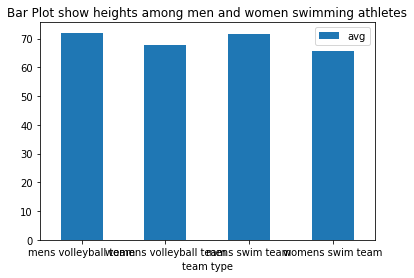

In [ ]:
#building a basic bar graph
average_heights.plot.bar(x ='team type', y = 'avg', rot= 0, title ='Bar Plot show heights among men and women swimming athletes')